In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RF


train_test30 = pd.read_csv('train_test_filtered_v2.csv')
oot30 = pd.read_csv('oot_filtered_v2.csv')

X = train_test30.drop('Fraud', axis = 1)
y = train_test30['Fraud']

num_iter = 10

results_dict = {}
keys = ['rf1', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6', 'rf7', 'rf8', 'rf9', 'rf10']

#begin loop
for j in range(0,num_iter):
    X_train, X_test, y_train, y_test = tts(X, y, test_size = .3, stratify = y, random_state = j)


    rf1_X_train = X_train.copy()
    rf1_X_test = X_test.copy()
    rf1_oot = oot30.copy().drop('Fraud', axis=1)
    rf1 = RF(n_estimators = 50, max_depth = 2).fit(rf1_X_train, y_train)

    rf2_X_train = X_train.copy()
    rf2_X_test = X_test.copy()
    rf2_oot = oot30.copy().drop('Fraud', axis=1)
    rf2 = RF(n_estimators = 100, max_depth = 4).fit(rf2_X_train, y_train)

    rf3_X_train = X_train.copy()
    rf3_X_test = X_test.copy()
    rf3_oot = oot30.copy().drop('Fraud', axis=1)
    rf3 = RF(n_estimators = 150, max_depth = 6).fit(rf3_X_train, y_train)

    rf4_X_train = X_train.copy()
    rf4_X_test = X_test.copy()
    rf4_oot = oot30.copy().drop('Fraud', axis=1)
    rf4 = RF(n_estimators = 100, max_depth = 8).fit(rf4_X_train, y_train)

    rf5_X_train = X_train.copy()
    rf5_X_test = X_test.copy()
    rf5_oot = oot30.copy().drop('Fraud', axis=1)
    rf5 = RF(n_estimators = 50, max_depth = 10).fit(rf1_X_train, y_train)

    rf6_X_train = X_train.copy()
    rf6_X_test = X_test.copy()
    rf6_oot = oot30.copy().drop('Fraud', axis=1)
    rf6 = RF(n_estimators = 100, min_samples_split = 12).fit(rf6_X_train, y_train)

    rf7_X_train = X_train.copy()
    rf7_X_test = X_test.copy()
    rf7_oot = oot30.copy().drop('Fraud', axis=1)
    rf7 = RF(n_estimators = 500, max_depth = 10, criterion = 'entropy', min_samples_split = 15).fit(rf7_X_train, y_train)

    rf8_X_train = X_train.copy()
    rf8_X_test = X_test.copy()
    rf8_oot = oot30.copy().drop('Fraud', axis=1)
    rf8 = RF(n_estimators = 500, max_depth = 15, criterion = 'entropy').fit(rf8_X_train, y_train)

    rf9_X_train = X_train.copy()
    rf9_X_test = X_test.copy()
    rf9_oot = oot30.copy().drop('Fraud', axis=1)
    rf9 = RF(n_estimators = 500, max_depth = 20, criterion = 'entropy').fit(rf9_X_train, y_train)

    rf10_X_train = X_train.copy()
    rf10_X_test = X_test.copy()
    rf10_oot = oot30.copy().drop('Fraud', axis=1)
    rf10 = RF(n_estimators = 100, max_depth = 25, criterion = 'entropy').fit(rf10_X_train, y_train)

## Establish list of model sets

    modList = [rf1, rf2, rf3, rf4, rf5, rf6, rf7, rf8, rf9, rf10]
    train_list = [rf1_X_train, 
                 rf2_X_train, rf3_X_train, rf4_X_train, rf5_X_train, rf6_X_train, rf7_X_train, rf8_X_train, rf9_X_train, 
                  rf10_X_train]
    test_list = [rf1_X_test,\
                rf2_X_test, rf3_X_test, rf4_X_test, rf5_X_test, rf6_X_test, rf7_X_test, rf8_X_test, rf9_X_test, rf10_X_test]
    oot_list = [rf1_oot, rf2_oot, rf3_oot, rf4_oot, rf5_oot, rf6_oot, rf7_oot, rf8_oot, rf9_oot, rf10_oot]

## Determine FDR @ 3% 

### On the training data...

    training_FDRs = []
    i = 0
    for model in modList:
        train_set = train_list[i]
        i+=1
        temp = train_set.copy()
        temp['scores'] = 0
        temp['scores'] = model.predict_proba(train_set)
        cutpoint = int(len(temp)*(.03))
        top3percent = temp.sort_values(by = 'scores', ascending = True).iloc[:cutpoint,:]
        FDR = train_test30.loc[top3percent.index, 'Fraud'].sum()/train_test30.loc[train_set.index, 'Fraud'].sum()
        training_FDRs.append(FDR)

    ### On the testing data...

    testing_FDRs = []
    i = 0
    for model in modList:
        test_set = test_list[i]
        i+=1
        temp = test_set.copy()
        temp['scores'] = 0
        temp['scores'] = model.predict_proba(test_set)
        cutpoint = int(len(temp)*(.03))
        top3percent = temp.sort_values(by = 'scores', ascending = True).iloc[:cutpoint,:]
        FDR = train_test30.loc[top3percent.index, 'Fraud'].sum()/train_test30.loc[test_set.index, 'Fraud'].sum()
        testing_FDRs.append(FDR)

    ### And on the OOT data...

    oot_FDRs = []
    i = 0
    for model in modList:
        oot_set = oot_list[i]
        i+=1
        temp = oot_set.copy()
        temp['scores'] = 0
        temp['scores'] = model.predict_proba(oot_set)
        cutpoint = int(len(temp)*(.03))
        top3percent = temp.sort_values(by = 'scores', ascending = True).iloc[:cutpoint,:]
        FDR = oot30.loc[top3percent.index, 'Fraud'].sum()/oot30['Fraud'].sum()
        oot_FDRs.append(FDR)

    FDRdict = {'Model': modList, 'trainingFDR':training_FDRs, 'testingFDR':testing_FDRs, 'ootFDR':oot_FDRs}
    modelFDRs = pd.DataFrame(FDRdict)
    
    key = keys[j]

    results_dict[key] = modelFDRs


In [3]:
final_results_df = pd.DataFrame(columns = ['Model', 'trainingFDR', 'testingFDR', 'ootFDR'])
final_results_df['Model'] = results_dict['rf1']['Model']
for col in ['trainingFDR', 'testingFDR', 'ootFDR']:
    final_results_df[col] = 0

for key in results_dict.keys():
    
    df = results_dict[key]
    
    for row in range(0, num_iter):
        for col in ['trainingFDR', 'testingFDR', 'ootFDR']:
            
            final_results_df.loc[row, col] = final_results_df[col][row] + df[col][row]
            

for row in range(0, num_iter):
        for col in ['trainingFDR', 'testingFDR', 'ootFDR']:
            final_results_df[col][row] = final_results_df[col][row]/num_iter
            
final_results_df

<ipython-input-3-37e492ace63c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_df[col][row] = final_results_df[col][row]/num_iter


,Model,trainingFDR,testingFDR,ootFDR
0,"(DecisionTreeClassifier(max_depth=2, max_featu...",0.637613,0.656962,0.476952
1,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.837432,0.836287,0.633086
2,"(DecisionTreeClassifier(max_depth=6, max_featu...",0.900904,0.889451,0.656506
3,"(DecisionTreeClassifier(max_depth=8, max_featu...",0.985353,0.946414,0.678067
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.997649,0.971308,0.675093
5,"(DecisionTreeClassifier(max_features='auto', m...",1.000000,0.981013,0.676580
6,"(DecisionTreeClassifier(criterion='entropy', m...",1.000000,0.981857,0.678067
7,"(DecisionTreeClassifier(criterion='entropy', m...",1.000000,0.983122,0.676952
8,"(DecisionTreeClassifier(criterion='entropy', m...",1.000000,0.982278,0.675465
9,"(DecisionTreeClassifier(criterion='entropy', m...",1.000000,0.981435,0.671004


In [4]:
final_results_df.to_csv('RandomForestResults_v2.csv')

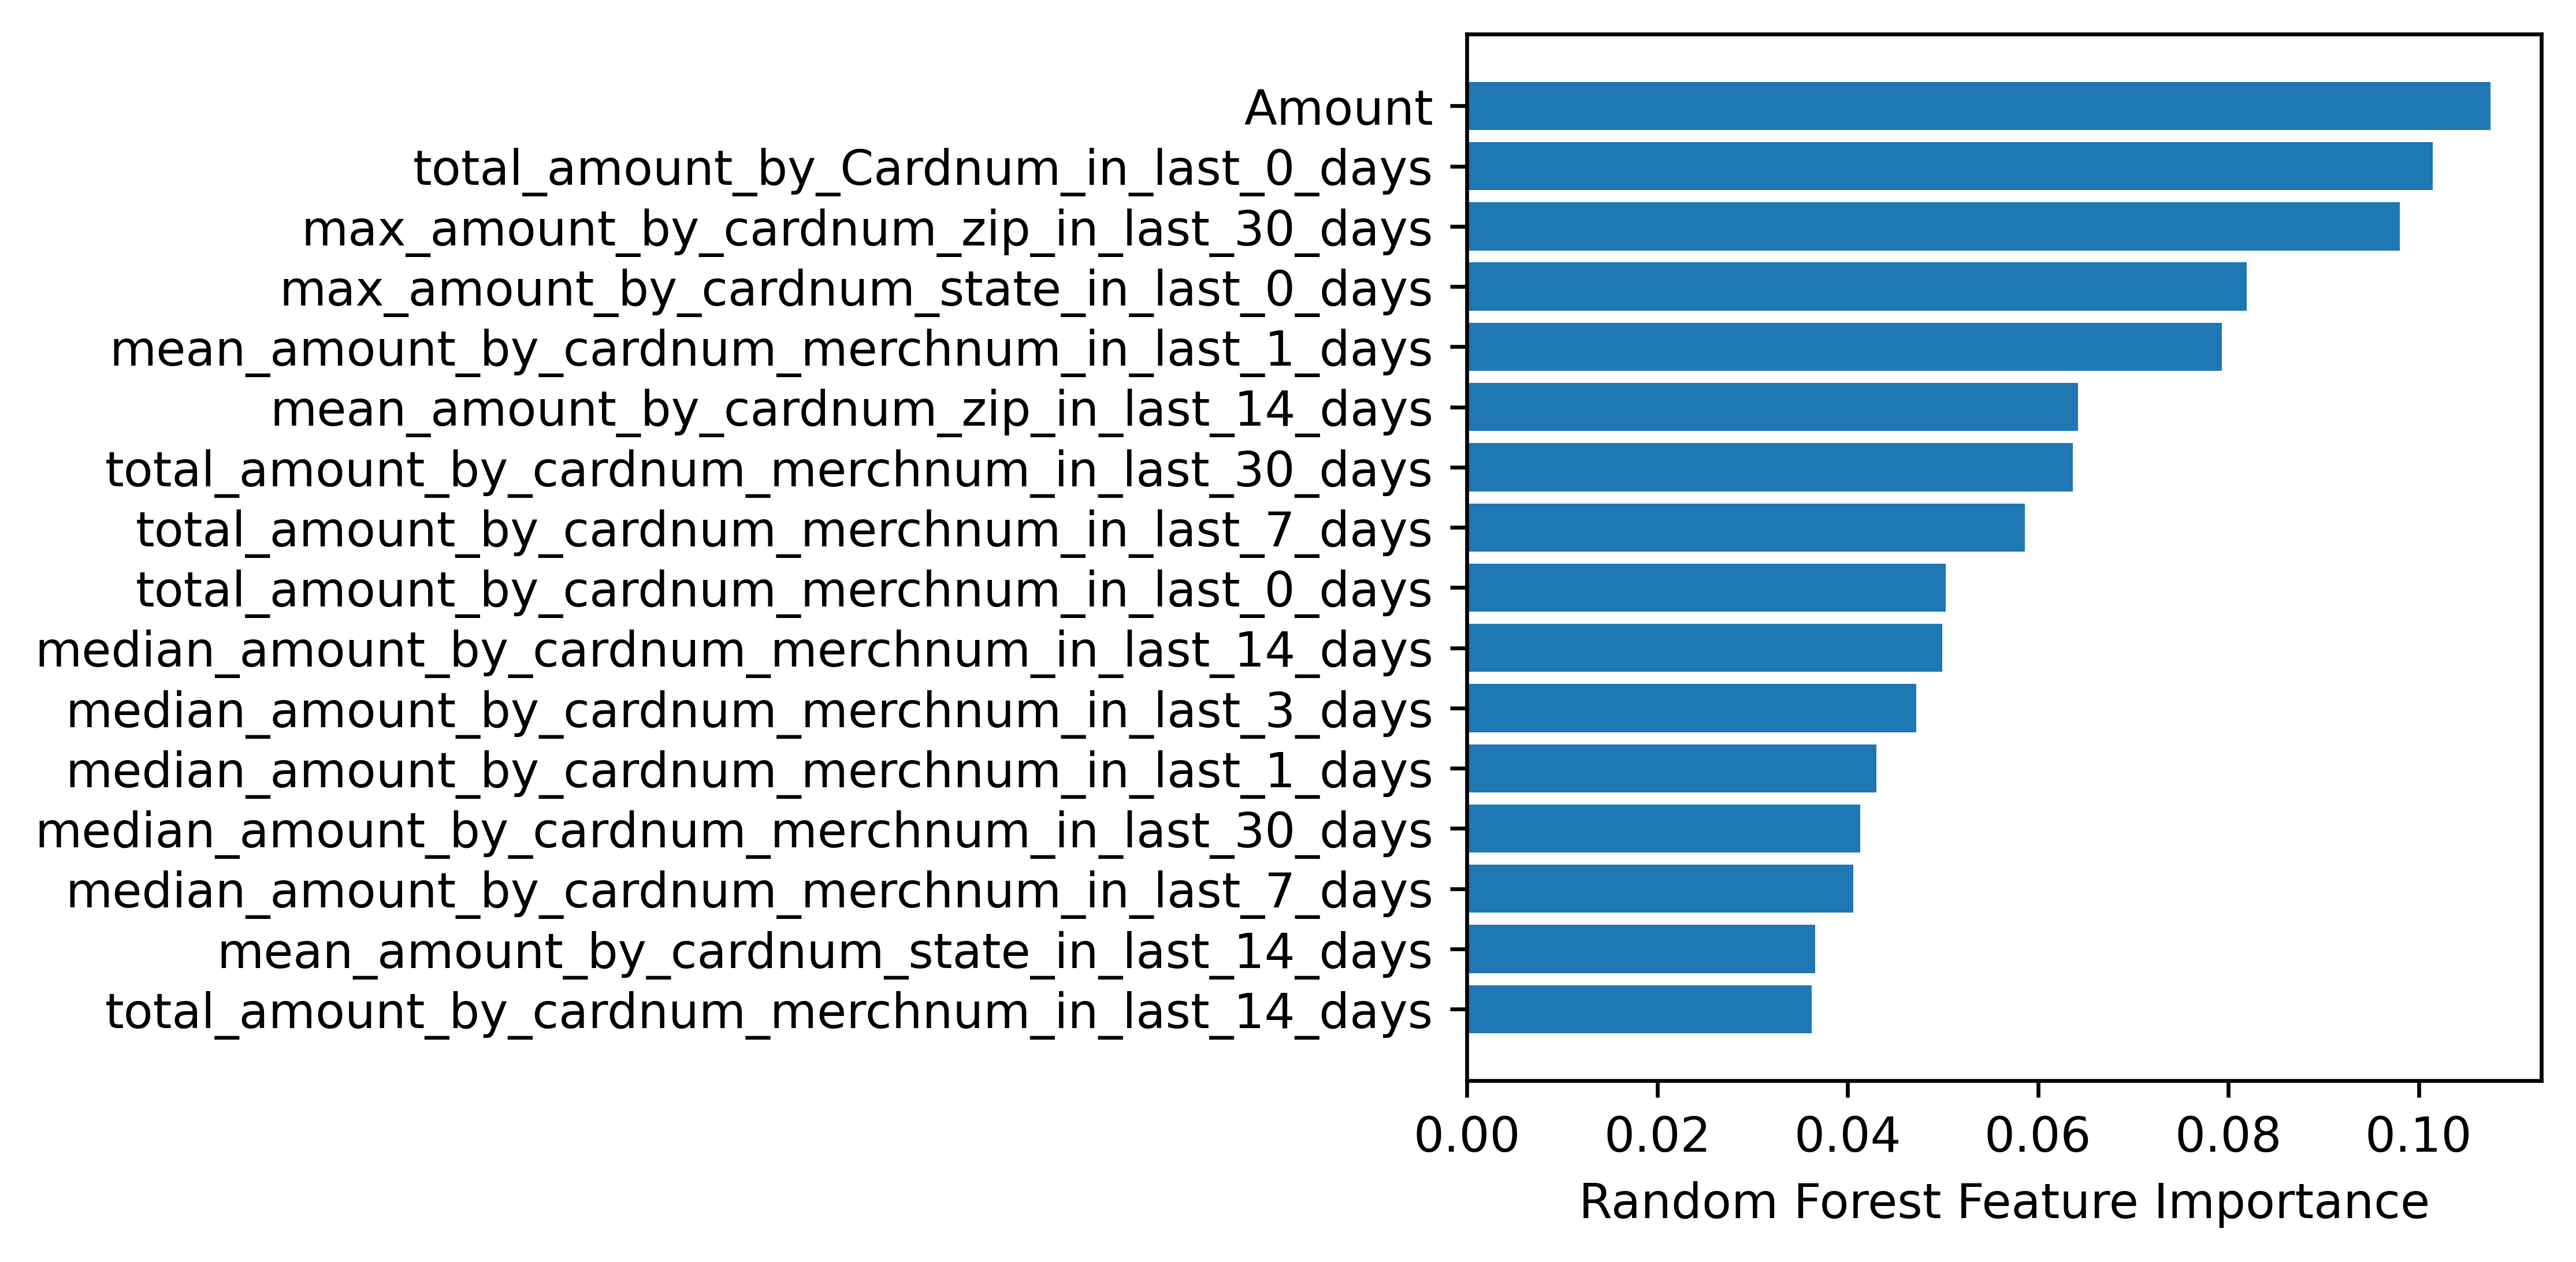

In [5]:
from matplotlib import pyplot as plt## plot the top 10 features in terms of Gini index
mod = rf5

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
sorted_idx = mod.feature_importances_.argsort() ## remove [-10:] to get a plot for all features
plt.barh(X_train.columns[sorted_idx], mod.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()